Example to use pymc on a real glacier

In [1]:
import test_model_pymc as tm
from pymc import MCMC

This study is only focusing on glaciers ['03473'] in region [15].
(1, 882) (882,)
[ 0.] (1,)


/home/tushar/anaconda3/envs/pymc/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


Importing glacer data

In [2]:
m = MCMC(tm)

Find index of glacier 15.03473 and 15.03733

In [3]:
m.sample(iter=1000, burn=0, thin=1)

 [-----------------100%-----------------] 1001 of 1000 complete in 568.7 sec

In [ ]:
m.trace('precfactor')[:]

In [ ]:
m.trace('ddfsnow')[:]

In [ ]:
m.trace('tempchange')[:]

In [4]:
from pylab import hist, show

In [5]:
from pymc.Matplot import plot

Plotting tempchange
Plotting ddfsnow
Plotting precfactor


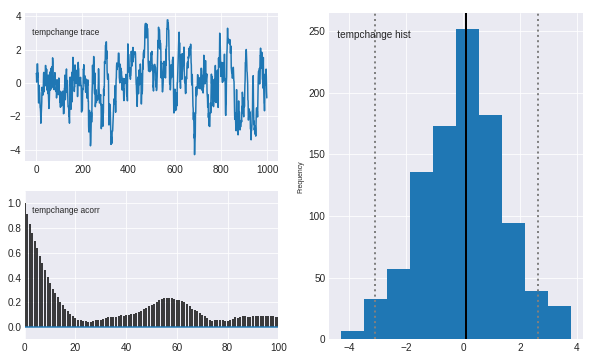

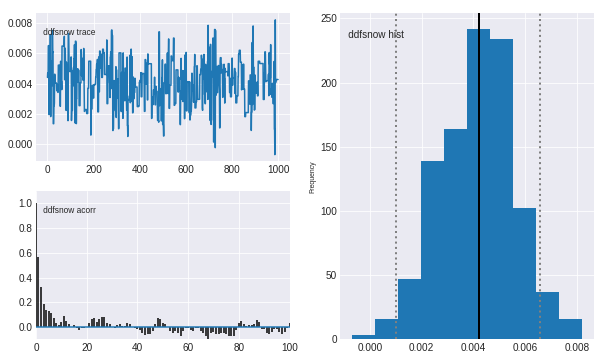

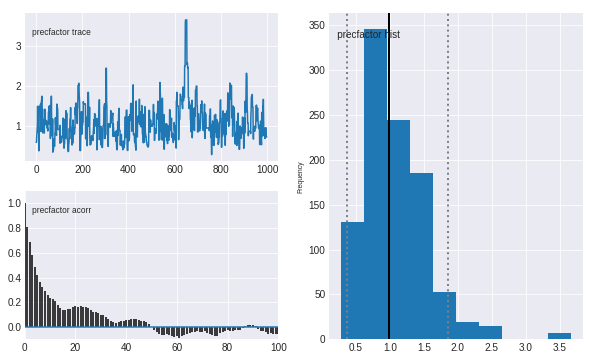

In [6]:
plot(m)

In [11]:
import pymc as pm
from pymc import geweke

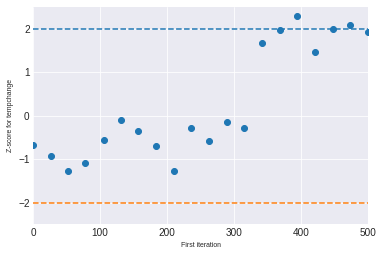

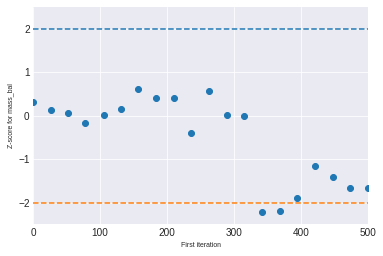

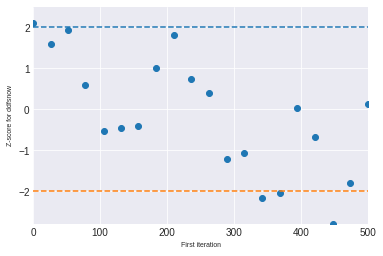

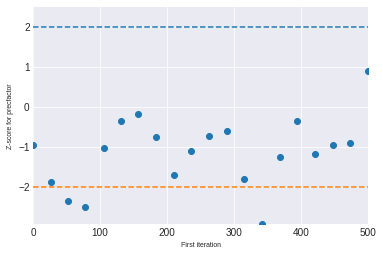

In [13]:
scores = geweke(m)
pm.Matplot.geweke_plot(scores)

In [14]:
m.summary()


tempchange:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	0.005            1.452            0.124            [-3.101  2.639]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	-2.881           -0.95           0.087          0.938         3.172
	

mass_bal:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	-0.655           1.018            0.082            [-2.62   1.455]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	-2.942           -1.258          -0.612         -0.02         1.318
	

ddfsnow:
 
	Mean             SD               MC Error        95% HPD interval
	-----------

/home/tushar/anaconda3/envs/pymc/lib/python3.6/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/tushar/anaconda3/envs/pymc/lib/python3.6/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/tushar/anaconda3/envs/pymc/lib/python3.6/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/tushar/anaconda3/envs/pymc/lib/python3.6/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [15]:
tm.observed_massbal

-0.54100000000000004

In [19]:
import v2_run_calibration_4Tushar as v2
v2.get_mass_balance(1.074, 0.004, 0.005)

-0.57807680415957197

Now generate random sampling using Latin Hypercube of the traces

In [22]:
precfactor = m.trace('precfactor')[:].copy()
ddfsnow = m.trace('ddfsnow')[:].copy()
tempchange = m.trace('tempchange')[:].copy()

In [24]:
tempchange.sort()

In [25]:
tempchange

array([ -4.29657436e+00,  -3.76568535e+00,  -3.68068956e+00,
        -3.62030092e+00,  -3.62030092e+00,  -3.57322280e+00,
        -3.57116801e+00,  -3.40763268e+00,  -3.29440721e+00,
        -3.26819498e+00,  -3.26702685e+00,  -3.22825224e+00,
        -3.20001924e+00,  -3.18215412e+00,  -3.16164419e+00,
        -3.10059549e+00,  -3.10059549e+00,  -3.06943029e+00,
        -3.06798743e+00,  -3.06216835e+00,  -3.05223951e+00,
        -3.01391978e+00,  -2.93570988e+00,  -2.88118390e+00,
        -2.88118390e+00,  -2.88118390e+00,  -2.86039245e+00,
        -2.84958492e+00,  -2.84958492e+00,  -2.81670863e+00,
        -2.81185947e+00,  -2.79276384e+00,  -2.76026734e+00,
        -2.76026734e+00,  -2.75414047e+00,  -2.75414047e+00,
        -2.75414047e+00,  -2.73792011e+00,  -2.73609186e+00,
        -2.67948199e+00,  -2.67405642e+00,  -2.61341280e+00,
        -2.60821839e+00,  -2.60821839e+00,  -2.60821839e+00,
        -2.60821839e+00,  -2.59991170e+00,  -2.59991170e+00,
        -2.59991170e+00,